<a href="https://colab.research.google.com/github/doeunyy/Wine-Data-Analysis/blob/main/KDE_WineProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 내 입맛에 맞는 와인 찾기 🍷


2024-2 | 이화여대 융합콘텐츠학과 - 콘텐츠데이터분석

작성자: 김도은 (2076035)

<br>

Fall 2024 | Content Data Analysis and Visualization at the Department of Content Convergence at Ewha Womans University

Author: Doeun Kim

---



### Ask: 데이터분석 주제 선정
- **주제**: 초보 와인 소비자를 위한 최적의 단일 와인 선택 기준 도출 프로젝트
  
  코로나 이후로 국내외 와인 소비가 늘어났으며, 특히 2030 세대의 와인 소비가 눈에 띄게 늘어남.
  
  그러나 와인 구매 시에는 맛, 가격, 포도 품종 등 고려 요소가 많아 초보 소비자들은 구매에 어려움을 겪음.
  
  이에 초보 와인 소비자가 단 하나의 기준으로 우수한 품질의 와인을 선택할 수 있도록 가장 적합한 기준을 제시하고자 함.

- **Stakeholders**: 초보 와인 소비자, 와인 판매업체 및 유통업체, 와인 리뷰 플랫폼

- **Main Question**: 초보 와인 소비자가 단 하나의 기준으로 높은 품질의 와인을 고르려면, 어떤 기준이 가장 적합할까?

  - Sub question 1: 높은 품질 평가를 받은 와인의 가격 분포는 어떻게 나타나는가?
  - Sub question 2: 높은 품질 평가를 받은 와인에서 공통적으로 나타나는 키워드는 무엇인가?
  - Sub question 3: 와인의 생산지(국가, 지역)이 품질 평가 점수에 유의미한 영향을 미치는가?
  - Sub question 4: 와인 포도 품종과 품질 평가 점수간에 유의미한 상관관계가 존재하는가?


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ewha/Content-Data-Analysis/winemag-data-130k-v2.csv')
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


## Data Preprocessing

In [ ]:
len(df)

129971

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


### 1. 불필요 컬럼 삭제

In [ ]:
# 컬럼 삭제
df = df.drop(['Unnamed: 0', 'designation', 'region_2', 'taster_twitter_handle'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   region_1     108724 non-null  object 
 6   taster_name  103727 non-null  object 
 7   title        129971 non-null  object 
 8   variety      129970 non-null  object 
 9   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 9.9+ MB


### 2. 결측치 삭제

In [ ]:
# price 컬럼의 결측치 삭제

df = df.dropna(subset = ['price'])
df

,country,description,points,price,province,region_1,taster_name,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,NaN,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [ ]:
# country 컬럼 결측치를 가질 때, province 컬럼도 결측치를 가질 확률

# country 컬럼이 결측치인 데이터프레임 필터링
country_nan = df[df['country'].isna()]

# province 컬럼에서 결측치의 수 계산
province_nan_count = country_nan['province'].isna().sum()

# country 컬럼이 결측치인 행의 총 수
total_country_nan = len(country_nan)

# 확률 계산
probability = province_nan_count / total_country_nan

print(f"Probability: {probability}")

Probability: 1.0


In [ ]:
#country 컬럼 결측치 삭제
df = df.dropna(subset = ['country', 'province'])
df

,country,description,points,price,province,region_1,taster_name,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,NaN,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120916 entries, 1 to 129970
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120916 non-null  object 
 1   description  120916 non-null  object 
 2   points       120916 non-null  int64  
 3   price        120916 non-null  float64
 4   province     120916 non-null  object 
 5   region_1     101400 non-null  object 
 6   taster_name  96420 non-null   object 
 7   title        120916 non-null  object 
 8   variety      120915 non-null  object 
 9   winery       120916 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 10.1+ MB


## Exploratory Data Analysis

본격적인 분석에 앞서 데이터 탐색해보기

In [ ]:
df.describe()

,points,price
count,120916.000000,120916.000000
mean,88.421723,35.368644
std,3.044942,41.031052
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


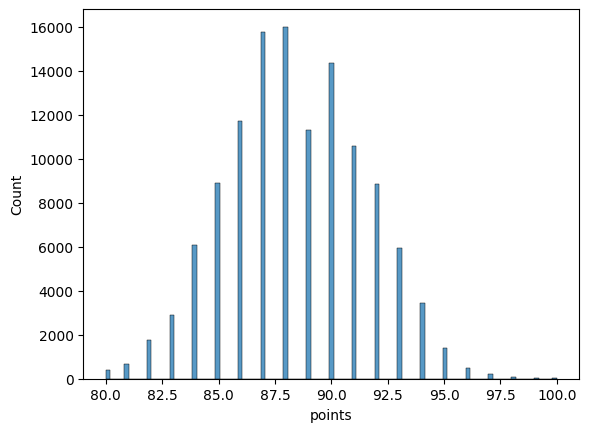

In [ ]:
# 점수(points) 분포 확인
sns.histplot(df['points'])
plt.show()

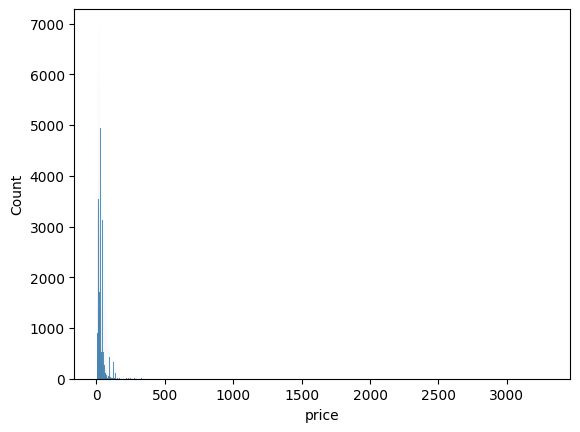

In [ ]:
# 가격(price) 분포 확인
sns.histplot(df['price'])
plt.show()

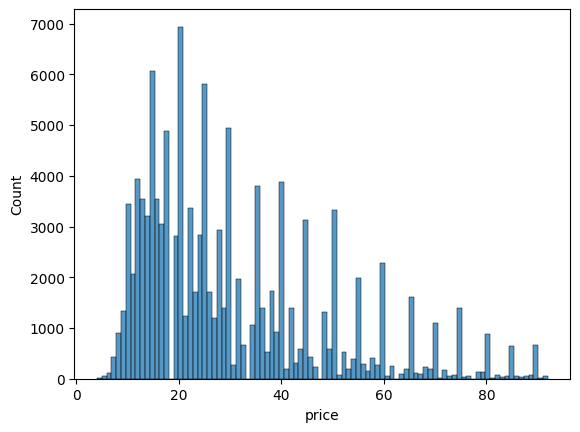

In [ ]:
# 가격(price) 분포 확인2
sns.histplot(df['price'][df['price'] < 93])  # 93 설정 이유: 95%
plt.show()

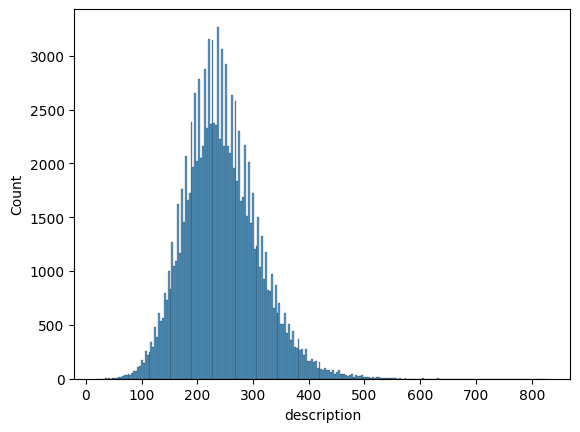

min:  20  / max:  829


In [ ]:
# 설명(description) 문자수 분포 확인 -> 설명 텍스트의 문장 길이 분석
sns.histplot(df['description'].map(len))
plt.show()
print("min: ", min(df['description'].map(len)), " / max: " , max(df['description'].map(len)))

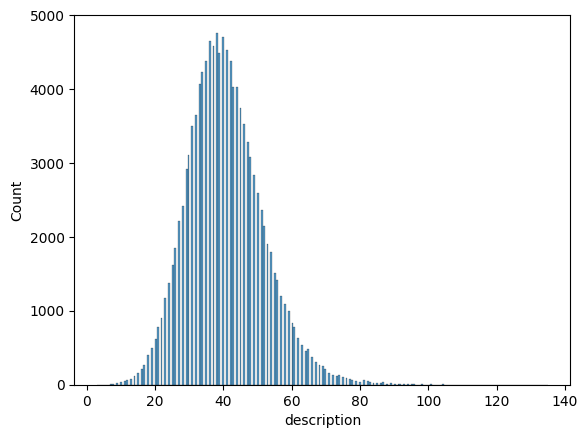

min:  3  / max:  135


In [ ]:
# 설명(description) 단어수 분포 확인 -> 설명 텍스트의 복잡성 분석
sns.histplot(df['description'].map(lambda x: len(x.split())))
plt.show()
print("min: ", min(df['description'].map(lambda x: len(x.split()))),  " / max: ", max(df['description'].map(lambda x: len(x.split()))))

In [ ]:
# 상위 30위에 해당하는 포도 종류별 개수
df['variety'].value_counts().head(30)

,count
variety,
Pinot Noir,12785
Chardonnay,11077
Cabernet Sauvignon,9384
Red Blend,8466
Bordeaux-style Red Blend,5340
Riesling,4971
Sauvignon Blanc,4780
Syrah,4086
Rosé,3261


## Data Analysis


- **Main Question**: 초보 와인 소비자가 단 하나의 기준으로 높은 품질의 와인을 고르려면, 어떤 기준이 가장 적합할까?

  - Sub question 1: 높은 품질 평가를 받은 와인의 가격 분포는 어떻게 나타나는가?
  - Sub question 2: 높은 품질 평가를 받은 와인에서 공통적으로 나타나는 키워드는 무엇인가?
  - Sub question 3: 와인의 생산지(국가, 지역)이 품질 평가 점수에 유의미한 영향을 미치는가?
  - Sub question 4: 와인 포도 품종과 품질 평가 점수간에 유의미한 상관관계가 존재하는가?

### Sub Question 1: 높은 품질 평가를 받은 와인의 가격 분포는 어떻게 나타나는가?

In [ ]:
# 90% 백분위수 구하기
percentile_90 = df['points'].quantile(0.9)
percentile_95 = df['points'].quantile(0.95)
percentile_97 = df['points'].quantile(0.97)

# 결과 출력
print(f"90%에 해당하는 points 값: {percentile_90}")
print(f"95%에 해당하는 points 값: {percentile_95}")
print(f"97%에 해당하는 points 값: {percentile_97}")

90%에 해당하는 points 값: 92.0
95%에 해당하는 points 값: 93.0
97%에 해당하는 points 값: 94.0


#### 1. 가격에 따른 점수 평균값 그래프

In [ ]:
filtered_df = df[df['price'] <= 93.0]

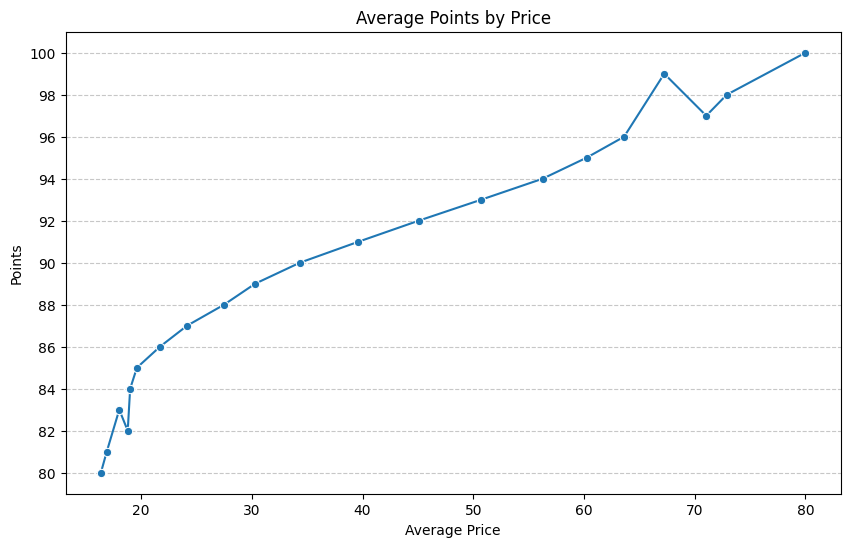

In [ ]:
# 점수별(points) 평균 price 계산
average_price_by_points = filtered_df.groupby('points')['price'].mean().reset_index()

# 시각화: 꺾은선 그래프
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_price_by_points, x='price', y='points', marker='o')

# Y축을 2점 단위로 격자 설정 및 숫자 표시
y_ticks = range(int(average_price_by_points['points'].min()),
                int(average_price_by_points['points'].max()) + 1, 2)
plt.yticks(y_ticks)  # 2점 간격의 Y축 라벨 설정

# 그래프 설정
plt.title("Average Points by Price")
plt.xlabel("Average Price")
plt.ylabel("Points")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Y축 격자선 추가
plt.show()

<ipython-input-58-5561f69bc30c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_points = filtered_df.groupby('price_range')['points'].mean().reset_index()


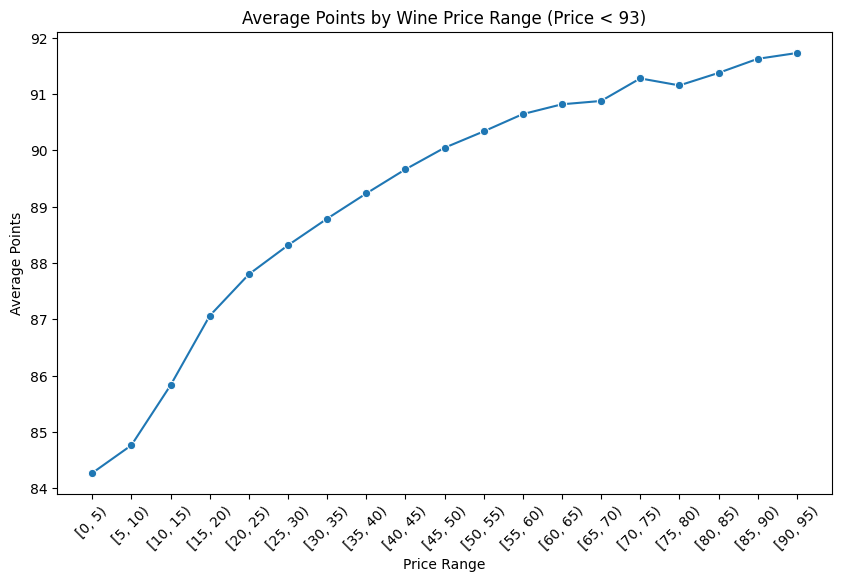

In [ ]:
# price 구간 설정 (10 단위)
filtered_df['price_range'] = pd.cut(filtered_df['price'], bins=range(0, 101, 5), right=False)

# 각 price 구간별 points의 평균값 계산
average_points = filtered_df.groupby('price_range')['points'].mean().reset_index()

# 결과 확인
# print(average_points)

# price_range를 문자열로 변환
average_points['price_range'] = average_points['price_range'].astype(str)

# 결과 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_points, x='price_range', y='points', marker='o')

# 그래프 설정
plt.title("Average Points by Wine Price Range (Price < 93)")
plt.xlabel("Price Range")
plt.ylabel("Average Points")
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

#### 2. 가격에 따른 점수 분포 히스토그램

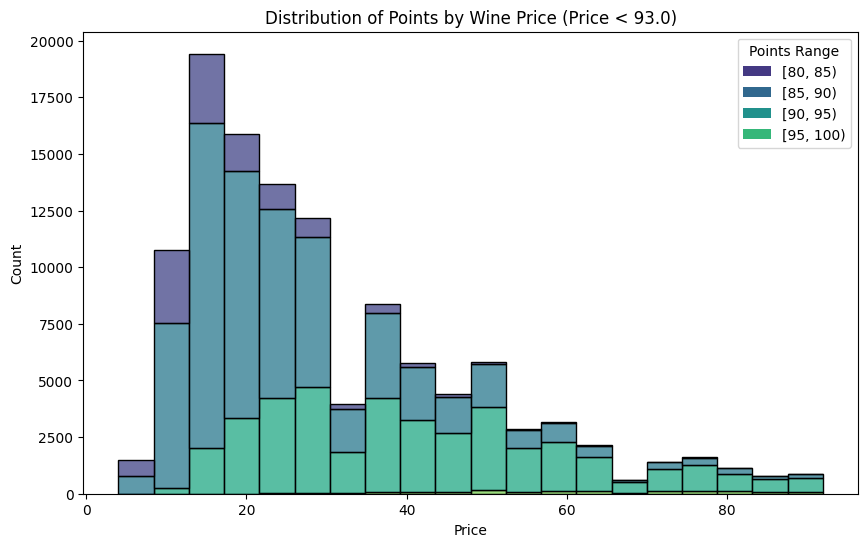

In [ ]:
from matplotlib.patches import Patch

# price가 93(95%) 이하인 데이터만 필터링
filtered_df = df[df['price'] < 93.0].copy()   # copy() 를 통해 복사본 생성을 해야 함

# points 값을 범주형으로 변환 (5점 단위로 구간화)
filtered_df['points_category'] = pd.cut(filtered_df['points'], bins=range(80, 101, 5), right=False)

# 범주형 데이터 확인
# print(filtered_df['points_category'].value_counts())

# 색상 팔레트 설정 (범주 수만큼 색상 생성)
palette = sns.color_palette("viridis", n_colors=len(filtered_df['points_category'].unique()))

# 와인 가격에 따른 품질(points) 분포 히스토그램
plt.figure(figsize=(10, 6))
histo = sns.histplot(
    data=filtered_df,
    x='price',
    hue='points_category',
    bins=20,
    palette="viridis",
    multiple="stack"
)

# legend 수동 추가
handles = [Patch(facecolor=palette[i], label=str(cat))
           for i, cat in enumerate(filtered_df['points_category'].cat.categories)]

plt.legend(handles=handles, title="Points Range")

# 그래프 설정
plt.title("Distribution of Points by Wine Price (Price < 93.0)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

### Sub Question 2: 높은 품질 평가를 받은 와인에서 공통적으로 나타나는 키워드는 무엇인가?

#### 키워드 추출

description 텍스트 전처리 -> preprocessed_desc 컬럼

In [ ]:
from tqdm import tqdm
import spacy
from collections import Counter

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # warning 무시

In [ ]:
# Spacy 영어 모델 로드
nlp = spacy.load('en_core_web_sm')

In [ ]:
# 전체 문서 가공 (lemmatization + 전처리)
tokens_normalized = []
for doc in tqdm(nlp.pipe(df['description'].str.lower())):
    lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
    tokens_normalized.append(lemmas)

120916it [12:29, 161.29it/s]


In [ ]:
from gensim.models.phrases import Phrases, Phraser

In [ ]:
# Bigram: 자주 함께 등장하는 단어 2개를 묶어줌
bigram_model = Phrases(tokens_normalized)
bigram_phraser = Phraser(bigram_model)

In [ ]:
# Trigram(3개) 만들기 위해 bigram 한번 더 진행
tokens_bigram = []
for s in tokens_normalized:
    bigram_phrases = bigram_phraser[s]
    tokens_bigram.append(bigram_phrases)

In [ ]:
# Trigram: 자주 함께 등장하는 단어 2개를 묶어줌
trigram_model = Phrases(tokens_bigram)
trigram_phraser = Phraser(trigram_model)

In [ ]:
tokens_trigram = []
for s in tokens_bigram:
    trigram_phrases = trigram_phraser[s]
    trigram_phrases = [token for token in trigram_phrases if token not in nlp.Defaults.stop_words and token != '-PRON-']
    tokens_trigram.append(trigram_phrases)

In [ ]:
preprocessed_sentences = []
for s in tokens_trigram:
  preprocessed_sentences.append(' '.join(s))

In [ ]:
#전처리된 컬럼 확인
df['preprocessed_desc'] = preprocessed_sentences
df

<ipython-input-70-5c79183e6cdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_desc'] = preprocessed_sentences


,country,description,points,price,province,region_1,taster_name,title,variety,winery,points_range,preprocessed_desc
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,85-90,ripe fruity wine smooth structure firm tannin ...
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,85-90,tart snappy flavor lime flesh rind dominate gr...
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,85-90,pineapple rind lemon_pith orange_blossom start...
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,85-90,like regular_bottling 2012 come_across rough t...
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,85-90,blackberry raspberry aromas typical navarran w...
...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,NaN,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),90-95,note honeysuckle cantaloupe sweeten deliciousl...
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,90-95,citation decade bottle age prior release mean ...
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,90-95,drain gravel_soil wine crisp dry character rip...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,90-95,dry style pinot_gris crisp acidity weight soli...


#### 구간별 키워드 워드클라우드

In [ ]:
# 분석 구간 설정 및 데이터 준비: points를 4개의 구간으로 나누기
df['points_range'] = pd.cut(df['points'], bins=[80, 85, 90, 95, 100],
                           labels=['80-85', '85-90', '90-95', '95-100'], right=False)

In [ ]:
# 단어 빈도 계산

# 모든 문서에서 단어별 빈도 계산
tokens_trigram = [description.split() for description in df['preprocessed_desc']]
full_counter = Counter([token for s in tokens_trigram for token in s])

# 자주 등장하는 단어 500개 추출
target_words = [key for key, value in full_counter.most_common(500)]


In [ ]:
# Counter를 사용하여 문서별 단어 빈도 계산
counters = [Counter(s) for s in tokens_trigram]

# 각 단어에 대한 IDF 값을 미리 계산
target_words_idf = {target_word: idf(target_word, counters) for target_word in target_words}

In [ ]:
'''
TF-IDF 점수 계산을 위한 함수 정의
'''

# TF 계산
def tf(word, document):
    return document[word] / sum(document.values())

# IDF 계산
def idf(word, corpus):
    num_containing = sum(1 for document in corpus if document[word] > 0)
    return len(corpus) / (1 + num_containing)  # 스무딩 처리 (+1)

# TF-IDF 계산
def tfidf(word, document, corpus):
    """TF-IDF 계산"""
    return tf(word, document) * target_words_idf[word]

# 특정 문서에 대해 TF-IDF 점수 계산
def tfidf_scores(document, others):
    scores = {}
    for word in target_words:
        if word not in document:
            score = 0
        else:
            score = tfidf(word, document, others)
        scores[word] = score
    return scores

# 여러 문서에 대해 평균 TF-IDF 계산
def average_tfidf(documents, other_documents):
    corpus = [Counter(other_document.split()) for other_document in other_documents]
    document_scores = []
    for document in documents:
        document_counter = Counter(document.split())
        document_scores.append(tfidf_scores(document_counter, corpus))

    average_scores = {}
    for document_score in document_scores:
        for token, score in document_score.items():
            average_scores[token] = average_scores.get(token, 0) + score

    average_scores = {token: score / len(documents) for token, score in average_scores.items()}
    return average_scores

Top Keywords for Points Range 80-85:
[('thin', 0.37653558280278265), ('simple', 0.27089235846437143), ('stalky', 0.21429672323395837), ('hot', 0.2104056268753481), ('bitter', 0.2052597723988299), ('rustic', 0.19799683474818539), ('lack', 0.1924482823196785), ('burn', 0.18467748311516494), ('basic', 0.17195395770660368), ('smell', 0.17151511016798723), ('short', 0.1713835098876454), ('acidic', 0.16941082034074176), ('modest', 0.1663551434301418), ('sour', 0.16269538051543106), ('sharp', 0.16136405242100885), ('heavy', 0.15938837836881234), ('tough', 0.1583671786918973), ('candy', 0.15478240025389303), ('taste', 0.15221188124376567), ('grassy', 0.14444506587579295), ('briny', 0.13809688745376392), ('juice', 0.13800891693655967), ('low', 0.13604231655995155), ('rubbery', 0.1284106561536816), ('turn', 0.12709459623178732), ('sweet', 0.12361817840636644), ('hard', 0.12345487880748529), ('green', 0.12253951154178899), ('little', 0.12235374263665394), ('lean', 0.12067656898994607), ('banana',

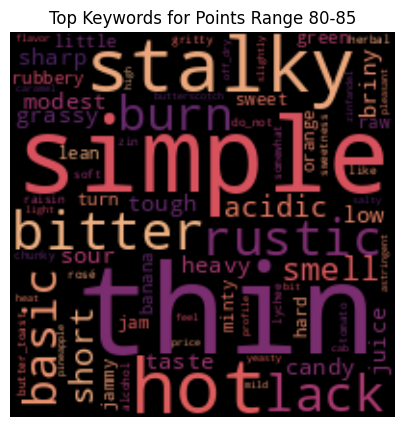

Top Keywords for Points Range 85-90:
[('straightforward', 0.08398719792022462), ('easy_drinking', 0.08365782802606797), ('easygoing', 0.08266730822725875), ('an_attractive', 0.08215035760135302), ('easy', 0.07420403908594754), ('attractive', 0.07228939846251563), ('fruity', 0.07035508260566342), ('ready_to', 0.06884262349347689), ('off_dry', 0.0678340075638036), ('white_flower', 0.06743954220822712), ('pleasant', 0.06728764899777673), ('lychee', 0.06718140103571768), ('light', 0.06627203651082297), ('light_bodied', 0.06596349871532937), ('drink_now', 0.06592136597694437), ('crisp', 0.06555965394641514), ('refreshing', 0.06536526384854353), ('citrusy', 0.06509581203414126), ('aftertaste', 0.06484913576977208), ('clean', 0.06474022621752067), ('simple', 0.06468838374451169), ('medium_bodied', 0.06462344677472724), ('nice', 0.06429499705171823), ('green_apple', 0.06354690234224356), ('fruitiness', 0.06353388184233823), ('melon', 0.06322854938472416), ('rosé', 0.06309146813314663), ('pair'

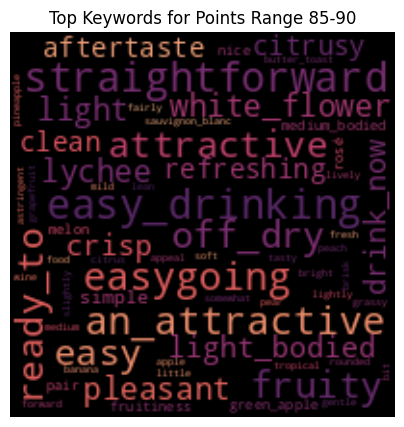

Top Keywords for Points Range 90-95:
[('impressive', 0.08940177393566073), ('beautiful', 0.08492117583810155), ('beautifully', 0.08113000256280255), ('opulent', 0.07976470060355546), ('velvety', 0.07843764422832265), ('lovely', 0.07782273777840741), ('from_2019', 0.07774527485366615), ('layered', 0.07747014212715496), ('complex', 0.07679687847307341), ('powerful', 0.07635029656190752), ('old_vine', 0.07557011960706521), ('refined', 0.07545961682890463), ('excellent', 0.07540599710311108), ('need_time', 0.07431833341777153), ('structured', 0.07415358057896684), ('concentrated', 0.0736177252030321), ('cellar', 0.07266589953437359), ('delicious', 0.0714607865934396), ('from_2018', 0.07077772486505483), ('focused', 0.070771500977646), ('length', 0.07061922758152342), ('concentrate', 0.07036659430262027), ('highlight', 0.06949347566604122), ('still_young', 0.06942590701856122), ('elegant', 0.06941444234572207), ('power', 0.06927604340861272), ('long', 0.06886743402865017), ('succulent', 0.0

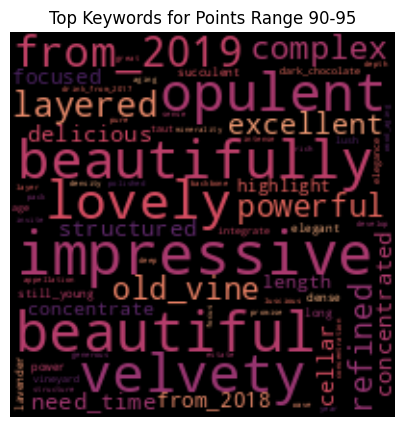

Top Keywords for Points Range 95-100:
[('beautiful', 0.20982510258355688), ('opulent', 0.20067912692647152), ('impressive', 0.19759772923815344), ('power', 0.19059763617052897), ('refined', 0.18076379541907342), ('great', 0.1697512843951565), ('powerful', 0.16714772880120324), ('beautifully', 0.16651656438390158), ('promise', 0.14490348245001217), ('aging', 0.13950026900241413), ('cellar', 0.1300624279263451), ('continue', 0.12975821434999532), ('develop', 0.12767452453752326), ('intensity', 0.12297219562241768), ('intense', 0.1194248933000174), ('pure', 0.11466603893002848), ('complex', 0.11435519274645312), ('vintage', 0.11202657463619756), ('california', 0.11196940222537294), ('potential', 0.11085722361019462), ('complexity', 0.11012592201688028), ('year', 0.1091328572202621), ('concentrated', 0.1063129461461207), ('richness', 0.10336322495353226), ('hold', 0.1029971991037554), ('elegance', 0.10249982160955627), ('dense', 0.10221226989091135), ('taut', 0.10130851145620579), ('struct

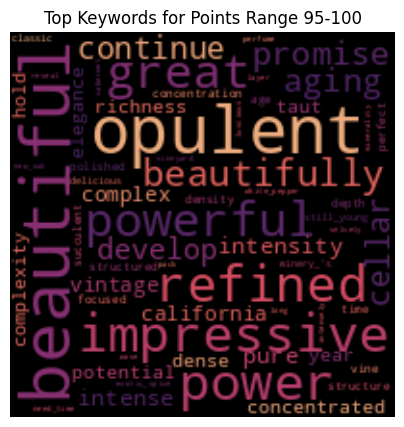

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 구간별로 평균 TF-IDF를 계산하고 워드클라우드 생성
for range_label in ['80-85', '85-90', '90-95', '95-100']:
    # 해당 구간에 속하는 문서
    target_df = df[df['points_range'] == range_label]

    # 전체 문서와 비교하여 TF-IDF 점수 계산
    scores = average_tfidf(target_df['preprocessed_desc'], df['preprocessed_desc'])

    # 점수를 기준으로 상위 100개 키워드 추출
    top_keywords = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:100]
    print(f"Top Keywords for Points Range {range_label}:")
    print(top_keywords)

    # 워드클라우드 생성
    wordcloud = WordCloud(width=200, height=200, background_color='black', colormap='flare').generate_from_frequencies(dict(top_keywords))

    # 시각화
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Top Keywords for Points Range {range_label}")
    plt.show()

### Sub question 3: 와인의 생산지(국가, 지역)이 품질 평가 점수에 유의미한 영향을 미치는가?

#### 통계적 검정

**ANOVA (분산 분석)**: 국가 또는 지역이 점수에 유의미한 영향을 미치는지 검증.

- 귀무가설 ($H_0$): 국가/지역별 평균 점수에 차이가 없다.
- 대립가설 ($H_1$): 국가/지역별 평균 점수에 차이가 있다.

In [ ]:
from scipy.stats import f_oneway

# 국가별 점수 분포
country_groups = [group['points'].values for name, group in df.groupby('country')]
anova_result = f_oneway(*country_groups)
print(f"ANOVA result (p-value): {anova_result.pvalue}")

ANOVA result (p-value): 0.0


**p-value 해석**

- $p$ < 0.05: 국가가 점수에 유의미한 영향을 미침.
- $p$ ≥ 0.05: 국가가 점수에 유의미한 영향을 미치지 않음.

<br>


> **p-value = 0.0** 이므로 와인 생산 국가가 품질 평가 점수에 유의미한 영향을 미친다고 해석할 수 있다.



#### (Additional) 사후 분석

Post-hoc 테스트: Tukey's HSD 검정

ANOVA에서 유의미한 차이가 발견되었으므로, 어떤 국가간의 차이가 있는지 확인을 위해 사후 분석을 추가 진행할 수 있음.

하지만, 해당 프로젝트에 해당되는 내용은 아님.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Post-hoc 분석
tukey = pairwise_tukeyhsd(df['points'], df['country'], alpha=0.05)
print(tukey)

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1                 group2         meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------------------
             Argentina                Armenia   0.7897    1.0  -7.4145  8.9939  False
             Argentina              Australia   1.8851    0.0   1.5778  2.1925   True
             Argentina                Austria   3.4805    0.0   3.1908  3.7701   True
             Argentina Bosnia and Herzegovina  -0.2103    1.0  -8.4145  7.9939  False
             Argentina                 Brazil  -2.0508 0.0018  -3.7533 -0.3483   True
             Argentina               Bulgaria   1.2258 0.0011   0.2308  2.2209   True
             Argentina                 Canada   2.6676    0.0   1.9156  3.4196   True
             Argentina                  Chile  -0.2149 0.3275  -0.4723  0.0426  False
             Argentina                  China   2.2897

#### 와인 생산 국가별 점수 평균값 박스플롯

- 그렇다면 와인 생산 국가별 점수 분포는 어떨까?
- 그렇다면 어떤 국가의 와인이 평균적으로 가장 좋은 품질 평가 점수를 받을까?

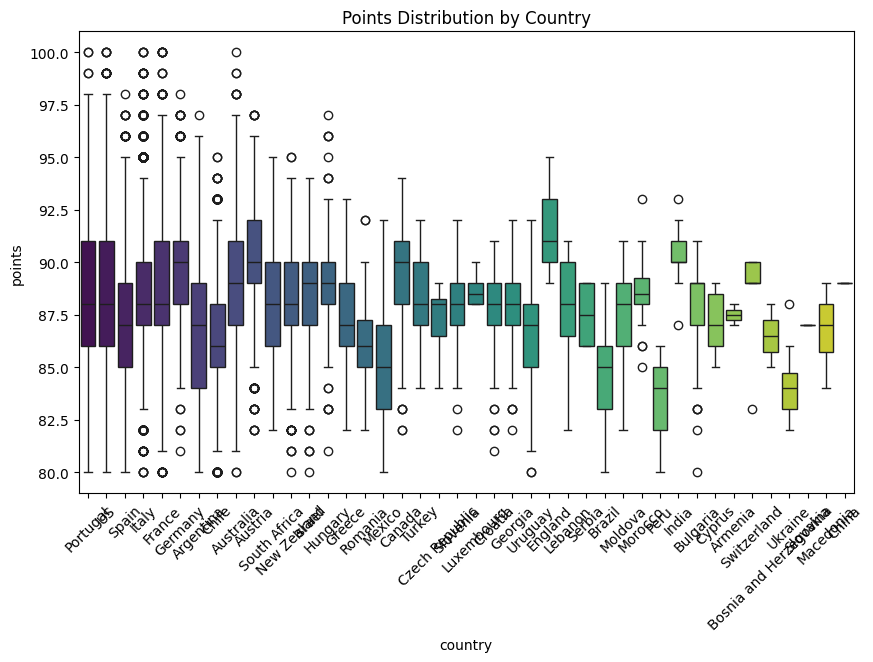

In [ ]:
# 국가별(Country) 평균 점수
country_points_summary = df.groupby('country')['points'].agg(['mean', 'std', 'count']).reset_index()
# print(country_points_summary)

# 국가별 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='country', y='points', hue='country', palette='viridis')
plt.xticks(rotation=45)
plt.title('Points Distribution by Country')
plt.show()

In [ ]:
# 와인 생산 국가 중에서 평균적으로 가장 좋은 품질 평가 점수를 받는 상위 10개 생산국

# 국가별 평균 점수 계산
country_mean_points = df.groupby('country')['points'].mean().reset_index()

# 평균 점수가 높은 상위 10개 품종 추출
top_10_countries = country_mean_points.sort_values(by='points', ascending=False).head(10)

# 결과 출력
print("Top 10 Grape Countries with the Highest Average Points: ")
print(top_10_countries)

Top 10 Grape Countries with the Highest Average Points: 
       country     points
13     England  91.550725
19       India  90.222222
3      Austria  90.190782
16     Germany  89.836321
7       Canada  89.377953
18     Hungary  89.165517
9        China  89.000000
14      France  88.734867
23  Luxembourg  88.666667
21       Italy  88.618186


#### 결과 분석 및 인사이트 도출

1. **결과 분석**

  a. Portugal, Spain, Italy, France:

  - 중앙값: 점수가 90점대로 높다.
  - IQR: 박스가 길고 분산이 존재하지만 대체로 점수가 높게 유지된다.
  - 이상치: 일부 점수가 80점대 초반이지만, 대부분의 점수가 90점 이상으로 집중되어 있다.
  - 해석: 포르투갈, 스페인, 이탈리아, 프랑스는 와인 품질 평가에서 전반적으로 높은 점수를 받는 국가이다.

  b. Argentina, Chile, Australia:

  - 중앙값: 약 88-90점 범위에 위치한다.
  - IQR: Argentina와 Chile는 박스가 짧고, Australia는 상대적으로 분산이 더 크다.
  - 이상치: 아르헨티나는 낮은 점수(80점대 초반)가 일부 보인다.
  - 해석: Argentina와 Chile는 높은 점수를 받지만 상대적으로 점수의 편차가 존재한다.
  
  c. Germany, Austria, South Africa:

  - 중앙값: 점수가 85-88점 정도에 위치한다.
  - IQR: 독일과 오스트리아의 점수 분포는 좁고 집중되어 있다.
  - 해석: 이 국가들은 평균적으로 점수가 높지만, 분포가 상대적으로 좁고 안정적이다.
  
  d. India, Brazil, Romania:

  - 중앙값: 80-85점으로 비교적 낮은 점수대에 위치한다.
  - IQR: 점수 분포가 좁으며 일부 이상치가 존재한다.
  - 해석: 이 국가들은 평균 점수가 상대적으로 낮고 품질이 균일하지 않은 경향을 보인다.
  
  e. Macedonia, Bosnia and Herzegovina, Switzerland:

  - 중앙값: 점수가 낮은 80점대로 위치한다.
  - IQR: 점수 분포가 매우 좁거나 데이터 포인트가 적어 신뢰성이 낮을 수 있다.
  - 해석: 이 국가들은 평가된 와인의 점수가 낮으며, 데이터의 수가 적을 가능성이 있다.

<br>

2. **인사이트**

  Portugal, Spain, Italy, France 등의 유럽 주요 와인 생산국은 전반적으로 점수가 높고, 품질이 일정 수준 이상으로 유지된다. 이는 이들 국가가 와인 품질 측면에서 전통적 강자임을 의미한다.

### Sub question 4: 와인 포도 품종과 품질 평가 점수간에 유의미한 상관관계가 존재하는가?




#### 통계적 검정

In [ ]:
# 품종별 점수 그룹화
variety_groups = [group['points'].values for name, group in df.groupby('variety')]

# ANOVA 검정 수행
anova_result = f_oneway(*variety_groups)
print(f"ANOVA result (p-value): {anova_result.pvalue}")

# p-value 해석
if anova_result.pvalue < 0.05:
    print("포도 품종과 품질 평가 점수 간에 유의미한 차이가 있습니다.")
else:
    print("포도 품종과 품질 평가 점수 간에 유의미한 차이가 없습니다.")

**p-value 해석**

- $p$ < 0.05: 포도 품종이 점수에 유의미한 영향을 미침.
- $p$ ≥ 0.05: 포도 품종이 점수에 유의미한 영향을 미치지 않음.

<br>


> **p-value = 0.0** 이므로 와인의 포도 품종이 품질 평가 점수에 유의미한 영향을 미친다고 해석할 수 있다.


#### 와인 포도 품종별 점수 평균값 시각화

- 그렇다면 포도 품종별 점수 분포는 어떨까?
- 그렇다면 어떤 포도 품종이 평균적으로 가장 좋은 품질 평가 점수를 받을까?


KeyboardInterrupt: 

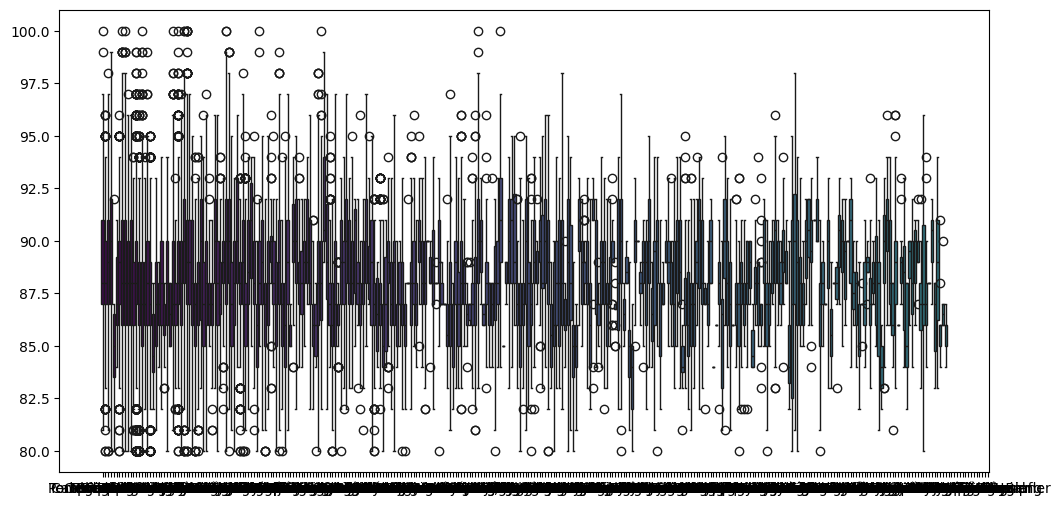

In [ ]:
# 품종별 점수 분포 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='variety', y='points', hue='variety', palette='viridis')
plt.xticks(rotation=45)
plt.title("Points Distribution by Wine Variety")
plt.show()

In [ ]:
# 와인 품종 중에서 평균적으로 가장 좋은 품질 평가 점수를 받는 상위 10개의 품종

# 품종별 평균 점수 계산
variety_mean_points = df.groupby('variety')['points'].mean().reset_index()

# 평균 점수가 높은 상위 10개 품종 추출
top_10_varieties = variety_mean_points.sort_values(by='points', ascending=False).head(10)

# 결과 출력
print("Top 10 Grape Varieties with the Highest Average Points: ")
print(top_10_varieties)

Top 10 Grape Varieties with the Highest Average Points: 
                 variety     points
586            Terrantez  95.000000
599       Tinta del Pais  95.000000
204      Gelber Traminer  95.000000
66                  Bual  94.333333
523              Sercial  94.000000
472  Riesling-Chardonnay  94.000000
52         Blauburgunder  93.000000
199    Garnacha-Cariñena  93.000000
491             Roviello  93.000000
461              Ramisco  93.000000


<ipython-input-46-ec708b9b30f3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10_varieties, x='variety', y='points', palette='viridis')


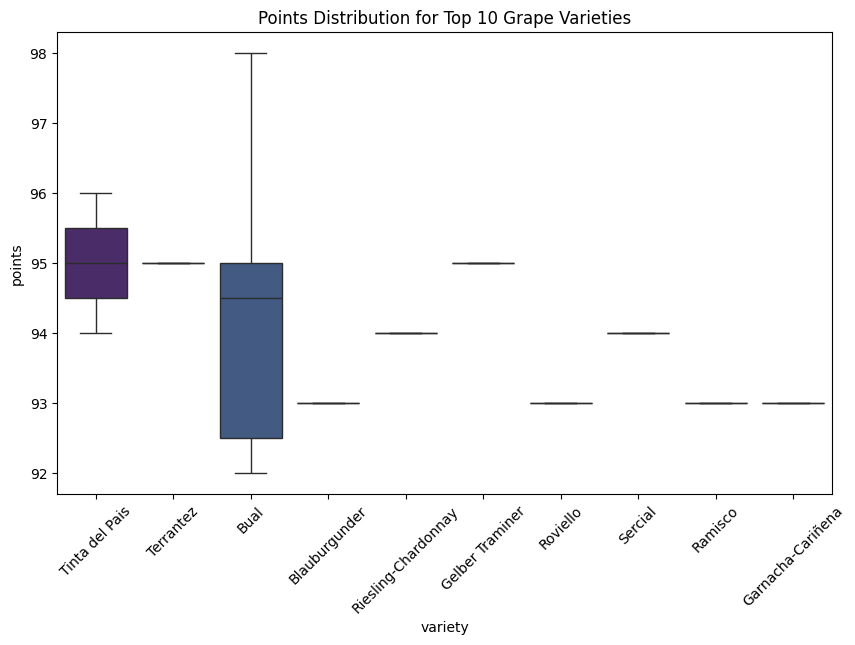

In [ ]:
# 상위 10개 품종에 대한 플롯만 시각화

# 상위 10개 품종의 이름 추출
top_10_varieties_names = top_10_varieties['variety']

# 상위 10개 품종에 해당하는 데이터 필터링
df_top_10_varieties = df[df['variety'].isin(top_10_varieties_names)]

# 상위 10개 품종의 점수 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top_10_varieties, x='variety', y='points', palette='viridis')
plt.xticks(rotation=45)
plt.title("Points Distribution for Top 10 Grape Varieties")
plt.show()


#### 결과 및 인사이트 도출

1. **결과 분석**

  - p-value = 0.0이 도출 되었으므로 귀무가설($H_0$: 모든 품종의 평균 점수가 같다)를 기각합니다. 결론적으로, 포도 품종은 점수에 유의미한 영향을 미친다고 해석할 수 있다.
  - 품종별 점수 분포 시각화 그래프는 품종이 너무 많아 x축 라벨이 과밀하게 나타났으며, 이에 따라 점수 분포 그래프 만으로 분석하는 것에는 어려움이 있었다.
  - 이를 해결하고자 품종별 평균 점수 계산 및 상위 10개의 품종을 도출하였으며, 그 결과는 다음과 같다.

    1. Terrantez      
    2. Gelber Traminer
    3. Tinta del Pais
    4. Bual
    5. Sercial
    6. Riesling-Chardonnay
    7. Garnacha-Cariñena
    8. Roviello
    9. Blauburgunder
    10. Ramisco

  
<br>

2. **인사이트**

## 컬럼별 상관관계 히트맵


country, points, price, province, variety, winery 컬럼들 간의 상관관계를 히트맵으로 시각화

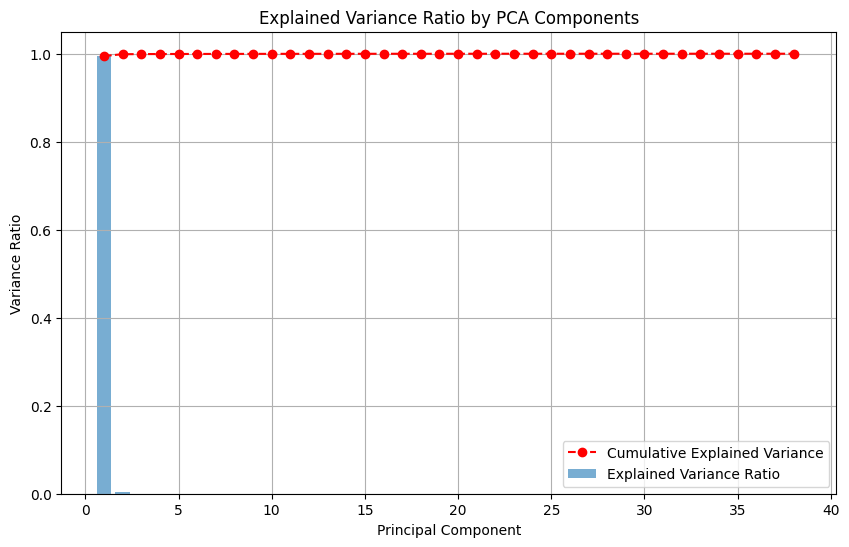

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# 1. 주요 범주만 선택
top_n = 10 # RAM 초과로 인해 주요 범주만 선택하도록 제한
for col in ['country', 'province', 'variety', 'winery']:
    top_categories = df[col].value_counts().nlargest(top_n).index
    df[col] = df[col].where(df[col].isin(top_categories), other='Other')

# 2. 샘플링 적용
sampled_df = df.sample(n=10000, random_state=42)

# 3. One-Hot Encoding
df_encoded = pd.get_dummies(sampled_df, columns=['country', 'province', 'variety', 'winery'], drop_first=True)

# 필요 없는 열 제거
df_numeric = df_encoded.drop(columns=['description', 'region_1', 'taster_name', 'title'])

# 4. PCA 적용
# n_components를 동적으로 설정
n_components = min(df_numeric.shape[0], df_numeric.shape[1], 50)
pca = PCA(n_components)
df_pca = pca.fit_transform(df_numeric)

# 주성분 별 분산 기여율 확인
explained_variance_ratio = pca.explained_variance_ratio_

# 누적 분산 기여율 계산
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 분산 기여율 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, alpha=0.6, label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_variance_ratio)+1), cumulative_variance_ratio, marker='o', linestyle='--', color='r', label='Cumulative Explained Variance')

plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance Ratio by PCA Components')
plt.legend()
plt.grid()
plt.show()

컬럼간의 상관관계를 파악하기 위해서는 값이 숫자형 데이터여야 하는데, country, province, variety 의 값은 수치값이 아니라 One-hot encoding을 통해 변환하는 과정을 거쳐야 했다.
하지만, 데이터 변환으로 인해 컬럼간의 유의미한 상관관계를 파악하기 어렵게 되었다.

-> 그렇다면, price, variety, country가 points 에 미치는 영향을 회귀분석으로 파악해볼 수 없을까?


## 회귀분석

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# 데이터 준비
df_cleaned = df.dropna(subset=['points', 'price', 'variety', 'country'])

# 범주형 변수 인코딩 (One-Hot Encoding)
df_encoded = pd.get_dummies(df_cleaned, columns=['variety', 'country'], drop_first=True)
df_numeric = df_encoded.drop(columns=['description', 'region_1', 'taster_name', 'title', 'province', 'winery'])

# 독립 변수(X)와 종속 변수(y) 설정
X = df_numeric.drop('points', axis=1)  # points를 제외한 나머지 열
y = df_numeric['points']

# 데이터 표준화 (가격 column에 적용)
scaler = StandardScaler()
X['price'] = scaler.fit_transform(X[['price']])

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.head())
print(X.dtypes)

      price  variety_Cabernet Sauvignon  variety_Chardonnay  variety_Other  \
1 -0.496401                       False               False           True   
2 -0.520778                       False               False           True   
3 -0.545155                       False               False          False   
4  0.722456                       False               False          False   
5 -0.496401                       False               False           True   

   variety_Pinot Noir  variety_Red Blend  variety_Riesling  variety_Rosé  \
1               False              False             False         False   
2               False              False             False         False   
3               False              False              True         False   
4                True              False             False         False   
5               False              False             False         False   

   variety_Sauvignon Blanc  variety_Syrah  country_Australia  country_Aust

In [ ]:
# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 평가
r_squared = model.score(X_test, y_test)
print(f"R-squared (모델 설명력): {r_squared:.4f}")

# 회귀 계수 확인
coefficients = pd.Series(model.coef_, index=X.columns)
print("Feature Importance (Coefficients):")
print(coefficients.sort_values(ascending=False))

R-squared (모델 설명력): 0.2357
Feature Importance (Coefficients):
country_Austria               3.193724
country_Portugal              1.653737
country_France                1.581021
country_Italy                 1.519243
country_Australia             1.491021
country_Other                 1.365852
country_US                    1.325717
price                         1.167331
variety_Riesling              0.997070
variety_Syrah                 0.938263
variety_Pinot Noir            0.704203
country_Spain                 0.534833
variety_Red Blend             0.114432
variety_Cabernet Sauvignon    0.098081
variety_Chardonnay            0.041625
variety_Other                -0.044581
country_Chile                -0.150200
variety_Sauvignon Blanc      -0.359564
variety_Rosé                 -1.091849
dtype: float64


In [ ]:
print(X_train.dtypes)  # X_train의 데이터 타입 확인
print("=====")
print(y_train.dtypes)  # y_train의 데이터 타입 확인

price                         float64
variety_Cabernet Sauvignon       bool
variety_Chardonnay               bool
variety_Other                    bool
variety_Pinot Noir               bool
variety_Red Blend                bool
variety_Riesling                 bool
variety_Rosé                     bool
variety_Sauvignon Blanc          bool
variety_Syrah                    bool
country_Australia                bool
country_Austria                  bool
country_Chile                    bool
country_France                   bool
country_Italy                    bool
country_Other                    bool
country_Portugal                 bool
country_Spain                    bool
country_US                       bool
dtype: object
=====
int64


In [ ]:
# bool 타입을 int로 변환
X_train_sm = X_train_sm.astype(float)
y_train = y_train.astype(float)

# OLS 회귀 분석 수행
ols_model = sm.OLS(y_train, X_train_sm).fit()

# 결과 요약 출력
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     1389.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:41:41   Log-Likelihood:            -2.3330e+05
No. Observations:               96780   AIC:                         4.666e+05
Df Residuals:                   96760   BIC:                         4.668e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               